# Search/Explore Merged CDAW/LASCO CME Event Catalog
This notebook is for searching/playing round with a merged CME catalog (which contains filenames).

In [1]:
import requests
import pandas as pd

Need_To_Redownload = False

Merged_Catalog_Filename = '../merged_cdaw_lasco_catalog.csv'

In [2]:
cme_data = pd.read_csv(Merged_Catalog_Filename)
cme_data = cme_data.drop('Unnamed: 0', axis=1)
cme_data

/Users/bathomas/Code/cdaw_cme_catalog_analysis/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
0,25000294.fts,C2,1024,1024,Orang,Clear,1996-01-31 08:01:38,25.4,Poor Event; Only 3 points\n,274,47,158,5
1,25000295.fts,C2,1024,1024,Orang,Clear,1996-01-31 09:11:14,25.0,Poor Event; Only 3 points\n,274,47,158,5
2,25000296.fts,C2,1024,1024,Orang,Clear,1996-01-31 10:20:39,25.0,Poor Event; Only 3 points\n,274,47,158,5
3,25000297.fts,C2,1024,1024,Orang,Clear,1996-01-31 11:30:19,25.9,Poor Event; Only 3 points\n,274,47,158,5
4,25000298.fts,C2,1024,1024,Orang,Clear,1996-01-31 12:40:17,25.1,Poor Event; Only 3 points\n,274,47,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398826,35513585.fts,C3,1024,1024,Clear,Clear,2017-08-31 23:04:45,17.6,Poor Event\n,275,54,274,28858
398827,35513586.fts,C3,1024,1024,Clear,Clear,2017-08-31 23:16:36,17.5,Poor Event\n,275,54,274,28858
398828,35513587.fts,C3,1024,1024,Clear,Clear,2017-08-31 23:28:54,17.9,Poor Event\n,275,54,274,28858
398829,35513588.fts,C3,1024,1024,Clear,Clear,2017-08-31 23:40:50,17.6,Poor Event\n,275,54,274,28858


In [3]:
# function to get unique values 
def unique(list1): 
      
    # insert the list to the set 
    list_set = set(list1) 
    # convert the set to the list 
    unique_list = (list(list_set)) 
    return unique_list
      

In [4]:
# test it out, try to pull a few intervals for events
C2_data = cme_data[cme_data['telescope']=='C2']
C2_data

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
0,25000294.fts,C2,1024,1024,Orang,Clear,1996-01-31 08:01:38,25.4,Poor Event; Only 3 points\n,274,47,158,5
1,25000295.fts,C2,1024,1024,Orang,Clear,1996-01-31 09:11:14,25.0,Poor Event; Only 3 points\n,274,47,158,5
2,25000296.fts,C2,1024,1024,Orang,Clear,1996-01-31 10:20:39,25.0,Poor Event; Only 3 points\n,274,47,158,5
3,25000297.fts,C2,1024,1024,Orang,Clear,1996-01-31 11:30:19,25.9,Poor Event; Only 3 points\n,274,47,158,5
4,25000298.fts,C2,1024,1024,Orang,Clear,1996-01-31 12:40:17,25.1,Poor Event; Only 3 points\n,274,47,158,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event\n,275,54,274,28858
398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event\n,275,54,274,28858
398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event\n,275,54,274,28858
398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event\n,275,54,274,28858


In [5]:
# remove events which have poor data OR are different type ("Halo")
slice1 = C2_data
#for filter in ['Only 3 points', 'Only 2 points', 'Poor Event', 'data gap', 'Partial Halo', 'Halo', 'Not LE']:
for filter in ['Very Poor Event', 'Only 2 points', 'Only 3 points', 'data gap', 'Partial Halo', 'Halo', 'Not LE']:
    slice1 = slice1[~slice1['Remarks'].str.contains(filter, regex=True)]
slice1

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
25,25000487.fts,C2,1024,1024,Orang,Clear,1996-02-12 07:01:57,25.1,Poor Event\n,91,53,160,8
26,25000488.fts,C2,1024,1024,Orang,Clear,1996-02-12 08:16:27,25.0,Poor Event\n,91,53,160,8
27,25000489.fts,C2,1024,1024,Orang,Clear,1996-02-12 09:30:48,25.1,Poor Event\n,91,53,160,8
28,25000490.fts,C2,1024,1024,Orang,Clear,1996-02-12 10:45:46,25.1,Poor Event\n,91,53,160,8
29,25000491.fts,C2,1024,1024,Orang,Clear,1996-02-12 12:00:22,13.8,Poor Event\n,91,53,160,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event\n,275,54,274,28858
398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event\n,275,54,274,28858
398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event\n,275,54,274,28858
398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event\n,275,54,274,28858


In [6]:
slice1.sort_values('Linear', ascending=True)[:1]

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
112356,25364416.fts,C2,1024,1024,Orang,Clear,2011-03-08 19:06:50,25.1,Poor Event\n,243,46,38,16091


In [7]:
slice1.sort_values('Linear', ascending=False)[:1]

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
68558,25187907.fts,C2,1024,1024,Orang,Clear,2005-01-17 10:04:48,24.6,Newly inserted on 2005/12/06\n,Halo,360,2547,9474


In [8]:
ids = list(slice1['CDAW_Id'])
foo = unique(ids)
len(foo)

5305

In [9]:
#slice1['CDAW_Id'][:20]

In [10]:
#cme_event = slice1[slice1['CDAW_Id']==428]
#cme_event

In [11]:
#list(cme_event['filename']) #.to_string()

In [12]:
# how many files if we isolate 1024x1024 images
slice2 = slice1
slice2 = slice2[slice2['NumCols']==1024]
slice2 = slice2[slice2['NumRows']==1024]
slice2

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
25,25000487.fts,C2,1024,1024,Orang,Clear,1996-02-12 07:01:57,25.1,Poor Event\n,91,53,160,8
26,25000488.fts,C2,1024,1024,Orang,Clear,1996-02-12 08:16:27,25.0,Poor Event\n,91,53,160,8
27,25000489.fts,C2,1024,1024,Orang,Clear,1996-02-12 09:30:48,25.1,Poor Event\n,91,53,160,8
28,25000490.fts,C2,1024,1024,Orang,Clear,1996-02-12 10:45:46,25.1,Poor Event\n,91,53,160,8
29,25000491.fts,C2,1024,1024,Orang,Clear,1996-02-12 12:00:22,13.8,Poor Event\n,91,53,160,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event\n,275,54,274,28858
398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event\n,275,54,274,28858
398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event\n,275,54,274,28858
398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event\n,275,54,274,28858


In [13]:
ids = list(slice2['CDAW_Id'])
len(unique(ids))

5289

In [14]:
#  Isolate events where we have 'campaign mode' (e.g. strange image sizes)
slice3 = slice1
slice3 = slice3[slice3['NumCols']!=1024]
slice3 = slice3[slice3['NumRows']!=1024]
campaign_ids = unique(list(slice3['CDAW_Id']))
print (len(campaign_ids))
#sorted(campaign_ids)

120


In [15]:
# cleaned list of general CMEs is now (campaign mode subtracted out)
cleaned = slice2[~slice2['CDAW_Id'].isin(campaign_ids)]
cleaned

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
25,25000487.fts,C2,1024,1024,Orang,Clear,1996-02-12 07:01:57,25.1,Poor Event\n,91,53,160,8
26,25000488.fts,C2,1024,1024,Orang,Clear,1996-02-12 08:16:27,25.0,Poor Event\n,91,53,160,8
27,25000489.fts,C2,1024,1024,Orang,Clear,1996-02-12 09:30:48,25.1,Poor Event\n,91,53,160,8
28,25000490.fts,C2,1024,1024,Orang,Clear,1996-02-12 10:45:46,25.1,Poor Event\n,91,53,160,8
29,25000491.fts,C2,1024,1024,Orang,Clear,1996-02-12 12:00:22,13.8,Poor Event\n,91,53,160,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event\n,275,54,274,28858
398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event\n,275,54,274,28858
398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event\n,275,54,274,28858
398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event\n,275,54,274,28858


In [16]:
ids = unique(list(cleaned['CDAW_Id']))
len(ids)

5172

In [17]:
# Remove events where they have only one file associated with it
result = cleaned.groupby('CDAW_Id', sort=False).count()
#result[result['CDAW_Id']=='8']
result['filename']


CDAW_Id
8         5
12        9
16        3
37        2
38        4
         ..
28844    33
28845    28
28851    28
28856    24
28858    20
Name: filename, Length: 5172, dtype: int64

<AxesSubplot:ylabel='Frequency'>

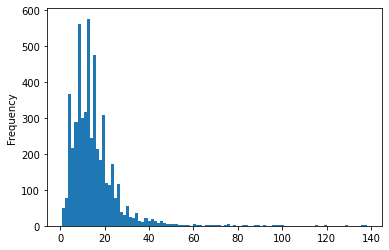

In [18]:
result['filename'].plot.hist(bins=100)
#plt.set(xlabel="foo")

In [19]:
# find the number of events where we have 6 or more files (images)
events_with_sufficent_images = result[result['filename']>=6]
#events_with_sufficent_images

In [20]:
#filter for the events with sufficent images now
esi_ids = list(events_with_sufficent_images.index)

cleaned2 = cleaned[cleaned['CDAW_Id'].isin(esi_ids)]
cleaned2

#esi_ids

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
50,25000681.fts,C2,1024,1024,Orang,Clear,1996-03-02 04:32:25,25.1,Poor Event\n,88,36,108,12
51,25000682.fts,C2,1024,1024,Orang,Clear,1996-03-02 05:28:23,25.1,Poor Event\n,88,36,108,12
52,25000683.fts,C2,1024,1024,Orang,Clear,1996-03-02 06:31:53,25.8,Poor Event\n,88,36,108,12
53,25000684.fts,C2,1024,1024,Orang,Clear,1996-03-02 07:35:53,25.1,Poor Event\n,88,36,108,12
54,25000685.fts,C2,1024,1024,Orang,Clear,1996-03-02 08:39:53,25.1,Poor Event\n,88,36,108,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event\n,275,54,274,28858
398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event\n,275,54,274,28858
398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event\n,275,54,274,28858
398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event\n,275,54,274,28858


<AxesSubplot:ylabel='Frequency'>

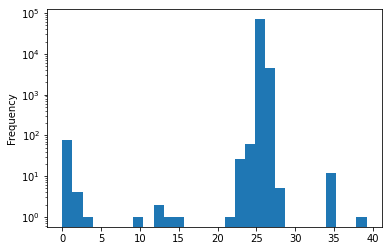

In [21]:
# examine exposure times
cleaned2['expTime'].plot.hist(logy=True, bins=30)

In [22]:
# get rid of exposure times which are not nominal (e.g. 25.1)
lower_exptime = 20.5
upper_exptime = 28.5

slice4 = cleaned2
slice4 = slice4[slice4['expTime']>= upper_exptime]

slice5 = cleaned2
slice5 = slice5[slice5['expTime']<= lower_exptime]

poor_exposure_ids = list(slice4['CDAW_Id'])
poor_exposure_ids.extend(list(slice5['CDAW_Id']))
poor_exposure_ids = unique (poor_exposure_ids)
len(poor_exposure_ids)

13

In [23]:
cleaned3 = cleaned2[~cleaned2['CDAW_Id'].isin(poor_exposure_ids)]
cleaned3

,filename,telescope,NumCols,NumRows,Filter,Polarizer,datetime,expTime,Remarks,Central,Width,Linear,CDAW_Id
50,25000681.fts,C2,1024,1024,Orang,Clear,1996-03-02 04:32:25,25.1,Poor Event\n,88,36,108,12
51,25000682.fts,C2,1024,1024,Orang,Clear,1996-03-02 05:28:23,25.1,Poor Event\n,88,36,108,12
52,25000683.fts,C2,1024,1024,Orang,Clear,1996-03-02 06:31:53,25.8,Poor Event\n,88,36,108,12
53,25000684.fts,C2,1024,1024,Orang,Clear,1996-03-02 07:35:53,25.1,Poor Event\n,88,36,108,12
54,25000685.fts,C2,1024,1024,Orang,Clear,1996-03-02 08:39:53,25.1,Poor Event\n,88,36,108,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
398791,25649074.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:11:10,25.1,Poor Event\n,275,54,274,28858
398792,25649075.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:23:08,25.3,Poor Event\n,275,54,274,28858
398793,25649076.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:35:08,25.1,Poor Event\n,275,54,274,28858
398794,25649077.fts,C2,1024,1024,Orang,Clear,2017-08-31 18:47:07,25.1,Poor Event\n,275,54,274,28858


<AxesSubplot:ylabel='Frequency'>

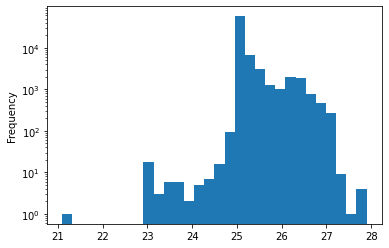

In [24]:
# examine exposure times
cleaned3['expTime'].plot.hist(logy=True, bins=30)